In [1]:
from IPython.display import clear_output
import time
try:

    !pip install h5py
    !pip install scikeras
    !pip install pandas
    !pip install Pillow
    !pip install matplotlib
    #!pip install sklearn
    !pip install tensorflow
    !pip install scikit-learn
    !pip install torch
    !pip install torchvision
    !pip install FCN
    time.sleep(5)
    clear_output()
    print("Packages successfully installed")

except:
    print("error installing packages")



Packages successfully installed


In [25]:
import h5py
import pandas as pd
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary
import cv2
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
import torch.nn.functional as F

In [3]:
#Brings in YOUR google drive directory, save data to google drive so that you
#dont have to download everytime
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
# This function from https://www.kaggle.com/competitions/isic-2024-challenge/discussion/519735
def remove_hair(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)

        _, thresh = cv2.threshold(blackhat, 10 ,255, cv2.THRESH_BINARY)
        inpainted_image = cv2.inpaint(image, thresh, 1, cv2.INPAINT_TELEA)
        return inpainted_image

(767, 1022, 3)


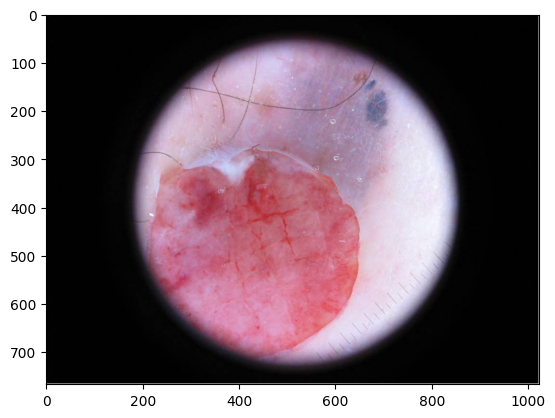

In [5]:
#test_images["ISIC_0015740"]
test_images_path = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image/ISIC_3723665.jpg"
test_images_path2 = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data/ISIC_0000004.jpg"

test_image = cv2.imread(test_images_path2)
print(test_image.shape)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()


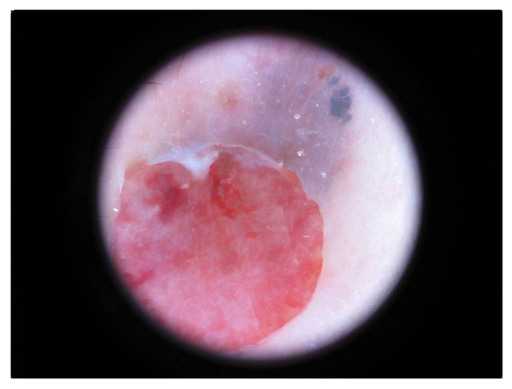

In [6]:
#plt.imshow(remove_hair(np.array(test_images["ISIC_0015740"])))
plt.imshow(remove_hair(np.array(test_image)))
plt.axis('off')
plt.show()

## Data Loading

In [7]:

#path to ISIC 2024 dataset on my google drive
#google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image"
google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-metadata.csv"

isic_2020_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_labels.csv"

isic_2019_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC2019_Training_labels.csv"

isic_2018_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_labels.csv"

isic_2017_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_labels.csv"


isic_2016_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISBI2016_Training_labels.csv"

In [8]:
isic_2020 = pd.read_csv(isic_2020_path)
isic_2020 = isic_2020[['image_name','target']]
#isic_2020
print(isic_2020['target'].value_counts())

target_1_2020 = isic_2020[isic_2020['target']==1].sample(n=584,random_state=42)
target_1_2020.rename(columns={'image_name':'isic_id'},inplace=True)
display(target_1_2020.shape)
display(target_1_2020.head())

target
0    32542
1      584
Name: count, dtype: int64


(584, 2)

,isic_id,target
22329,ISIC_6767569,1
24088,ISIC_7312977,1
5627,ISIC_1785627,1
26613,ISIC_8066110,1
29231,ISIC_8838753,1


In [9]:
isic_2019 = pd.read_csv(isic_2019_path)
isic_2019 = isic_2019[['image','MEL']]
#isic_2020
print(isic_2019['MEL'].value_counts())

target_1_2019 = isic_2019[isic_2019['MEL']==1].sample(n=4522,random_state=42)
target_1_2019.rename(columns={'image':'isic_id','MEL':'target'},inplace=True)
display(target_1_2019.shape)
display(target_1_2019.head())

MEL
0.0    20809
1.0     4522
Name: count, dtype: int64


(4522, 2)

,isic_id,target
22503,ISIC_0068778,1.0
15900,ISIC_0058285,1.0
25288,ISIC_0073194,1.0
15717,ISIC_0058003,1.0
23357,ISIC_0070105,1.0


In [10]:
isic_2018 = pd.read_csv(isic_2018_path)
isic_2018 = isic_2018[['image','MEL']]
#isic_2020
print(isic_2018['MEL'].value_counts())

target_1_2018 = isic_2018[isic_2018['MEL']==1].sample(n=1113,random_state=42)
target_1_2018.rename(columns={'image':'isic_id','MEL':'target'},inplace=True)
display(target_1_2018.shape)
display(target_1_2018.head())

MEL
0.0    8902
1.0    1113
Name: count, dtype: int64


(1113, 2)

,isic_id,target
8993,ISIC_0033299,1.0
1133,ISIC_0025439,1.0
9728,ISIC_0034034,1.0
8318,ISIC_0032624,1.0
3316,ISIC_0027622,1.0


In [11]:
isic_2017 = pd.read_csv(isic_2017_path)
isic_2017 = isic_2017[['image_id','melanoma']]
#isic_2020
print(isic_2017['melanoma'].value_counts())
print(isic_2017.shape)

target_1_2017 = isic_2017[isic_2017['melanoma']==1].sample(n=374,random_state=42)
target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)
display(target_1_2017.shape)
display(target_1_2017.head())

melanoma
0.0    1626
1.0     374
Name: count, dtype: int64
(2000, 2)


(374, 2)

,isic_id,target
1766,ISIC_0014360,1.0
140,ISIC_0000154,1.0
54,ISIC_0000056,1.0
1759,ISIC_0014331,1.0
242,ISIC_0000285,1.0


In [12]:
isic_2016 = pd.read_csv(isic_2016_path)
#isic_2016
isic_2016.columns = ["isic_id","target"]#isic_2016[['ISIC_0000000','melanoma']]
#isic_2016
#isic_2020
print(isic_2016['target'].value_counts())

isic_2016['target'] = isic_2016['target'].map({'malignant': 1, 'benign': 0})

target_1_2016 = isic_2016[isic_2016['target']==1].sample(n=173,random_state=42)
#target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)

display(target_1_2016.shape)
display(target_1_2016.head())

target
benign       726
malignant    173
Name: count, dtype: int64


(173, 2)

,isic_id,target
832,ISIC_0011210,1
185,ISIC_0000281,1
362,ISIC_0001134,1
256,ISIC_0000395,1
622,ISIC_0010194,1


In [13]:
metadata = pd.read_csv(google_drive_path)
metadata = metadata[['isic_id', 'target']]

<ipython-input-13-bac97242d0f8>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(google_drive_path)


In [14]:
print(metadata['target'].value_counts())

target
0    400666
1       393
Name: count, dtype: int64


In [15]:
# Load metadata
#metadata = pd.read_csv('isic-2024-challenge/train-metadata.csv')


# Ensure an even split of target=0 and target=1
target_0 = metadata[metadata['target'] == 0].sample(n=10000, random_state=42)
target_1 = metadata[metadata['target'] == 1].sample(n=393, random_state=42)

#balanced_metadata = pd.concat([target_0, target_1,target_1_2017,
                               #target_1_2018,target_1_2019,target_1_2020,
                               #target_1_2016]).reset_index(drop=True)

balanced_metadata = pd.concat([target_0, target_1]).reset_index(drop=True)
# Split the metadata into training and validation sets
train_metadata, val_metadata = train_test_split(balanced_metadata, test_size=0.2, random_state=42)


In [16]:
print(balanced_metadata['target'].value_counts())
print(train_metadata.shape)
#print(balanced_metadata['melanoma'].value_counts())
#print(type(train_metadata))
print(train_metadata['target'].value_counts())
print(val_metadata['target'].value_counts())
train_metadata.describe()

target
0    10000
1      393
Name: count, dtype: int64
(8314, 2)
target
0    8009
1     305
Name: count, dtype: int64
target
0    1991
1      88
Name: count, dtype: int64


,target
count,8314.000000
mean,0.036685
std,0.187999
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Pre-Processing

Standaring

In [17]:
from torch.utils.data import DataLoader, ConcatDataset

In [18]:
#for ISIC 2024 hpf5 files
# Define the custom dataset class
class ISIC2024Dataset(Dataset):
    def __init__(self, metadata: pd.DataFrame, file_hdf: str, transform=None):
        self.metadata = metadata
        self.fp_hdf = h5py.File(file_hdf, mode="r")
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, item):
        isic_row = self.metadata.iloc[item]
        isic_id = isic_row.isic_id
        image = np.array(Image.open(io.BytesIO(self.fp_hdf[isic_id][()])))
        label = isic_row.target

        if self.transform:
            image = self.transform(image)

        return image, label


In [19]:
class ISIC_Folder_Dataset(Dataset):
  def __init__(self, metadata: pd.DataFrame, folder_path,transform=None):
    self.metadata = metadata
    self.folder_path = str(folder_path)
    self.transform = transform

  def __len__(self):
    return len(self.metadata)

  def __getitem__(self,item):
    isic_row = self.metadata.iloc[item]
    isic_id = isic_row.isic_id
    label = isic_row.target
    image_path =f"{self.folder_path}/{isic_id}.jpg"
    image = np.array(Image.open(image_path))

    if self.transform:
      image = self.transform(image)

    return image, label



In [20]:
google_drive_train_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image.hdf5"
google_drive_test_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/test-image.hdf5"

#paths are to TRAINING IMAGES FOLDERS
isic2016_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISIC2016_Training_Data"
isic2019_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC_2019_Training_Input"
isic2018_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_Data"
isic2017_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data"
isic2020_folder_train = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_Data"


In [21]:
# Define image transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset objects
#train_dataset = ISIC2024Dataset(train_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)
#val_dataset = ISIC2024Dataset(val_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)
train_dataset = ISIC2024Dataset(train_metadata, google_drive_train_image, transform=transform)
val_dataset = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform)

#paths are to TRAINING FOLDER
train_dataset_2016 = ISIC_Folder_Dataset(target_1_2016, isic2016_folder, transform=transform)
train_dataset_2019 = ISIC_Folder_Dataset(target_1_2019, isic2019_folder, transform=transform)
val_dataset_2018 = ISIC_Folder_Dataset(target_1_2018,isic2018_folder,transform=transform)
train_dataset_2017 = ISIC_Folder_Dataset(target_1_2017, isic2017_folder, transform=transform)
train_dataset_2020 = ISIC_Folder_Dataset(target_1_2020, isic2020_folder_train, transform=transform)
#val_dataset_2016 = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform)

#print(type(train_dataset))


In [22]:
# Create data loaders

#isic2016_train_loader = DataLoader(train_dataset_2016,batch_size=32,shuffle=True,num_workers=0)

concat_train = ConcatDataset([train_dataset,train_dataset_2016,train_dataset_2020,
                              train_dataset_2019,train_dataset_2017])

#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
train_loader = DataLoader(concat_train, batch_size=32, shuffle=True, num_workers=0)

concat_val = ConcatDataset([val_dataset,val_dataset_2018])
#val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
val_loader = DataLoader(concat_val, batch_size=32, shuffle=False, num_workers=0)

print(type(train_loader))
print(len(train_loader))
print(len(val_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
437
100


## ResNet18 (Working)

In [22]:
# Define the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,input_size=(3,224,224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 205MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [24]:
# Training loop
num_epochs = 10

epoch_losses_train = []
epoch_accuracy_train = []
epoch_losses_test=[]
epoch_accuracy_test=[]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train.append(epoch_loss)
    epoch_accuracy_train.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


    # Evaluation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0



    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)

            val_loss += loss.item() * images.size(0)

            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    accuracy = correct / total
    epoch_losses_test.append(val_loss)
    epoch_accuracy_test.append(accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/10], Loss: 0.1334, Accuracy: 0.9600
Validation Loss: 0.1219, Accuracy: 0.9706
Epoch [2/10], Loss: 0.0876, Accuracy: 0.9749
Validation Loss: 0.0813, Accuracy: 0.9724
Epoch [3/10], Loss: 0.0902, Accuracy: 0.9742
Validation Loss: 0.1191, Accuracy: 0.9677
Epoch [4/10], Loss: 0.0862, Accuracy: 0.9737
Validation Loss: 0.0795, Accuracy: 0.9737
Epoch [5/10], Loss: 0.0814, Accuracy: 0.9759
Validation Loss: 0.0998, Accuracy: 0.9731
Epoch [6/10], Loss: 0.0754, Accuracy: 0.9782
Validation Loss: 0.0834, Accuracy: 0.9731
Epoch [7/10], Loss: 0.0729, Accuracy: 0.9777
Validation Loss: 0.0752, Accuracy: 0.9731
Epoch [8/10], Loss: 0.0730, Accuracy: 0.9769
Validation Loss: 0.0782, Accuracy: 0.9759
Epoch [9/10], Loss: 0.0696, Accuracy: 0.9784
Validation Loss: 0.0894, Accuracy: 0.9718
Epoch [10/10], Loss: 0.0677, Accuracy: 0.9784
Validation Loss: 0.0995, Accuracy: 0.9731


In [25]:
# Evaluation loop
#moved to above loop
model.eval()
val_loss = 0.0
correct = 0
total = 0



with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item() * images.size(0)

        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss = val_loss / len(val_loader.dataset)
accuracy = correct / total
print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Validation Loss: 0.0995, Accuracy: 0.9731


In [26]:
metadata['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [27]:
print(len(epoch_losses_train))
print(len(epoch_accuracy_train))

10
10


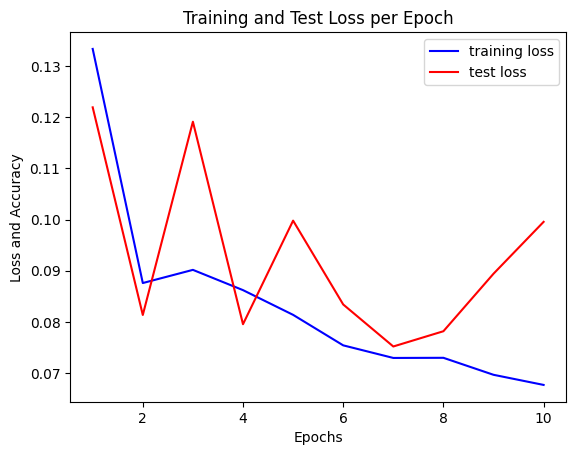

In [28]:
plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("Training and Test Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

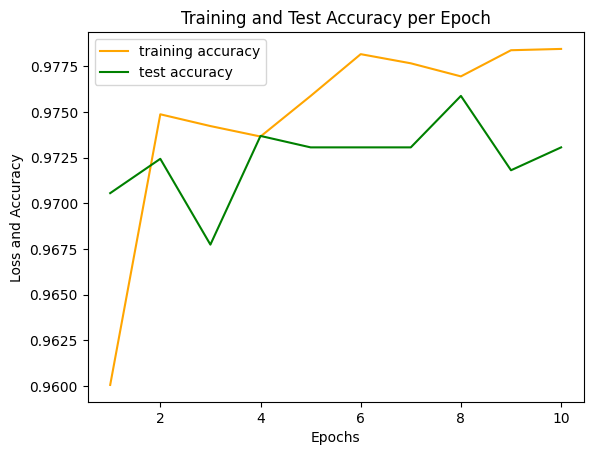

In [29]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
         label='test accuracy',color='green')

plt.title("Training and Test Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

## Custom CNN Pytorch

In [62]:
#define custom cnn
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        #self.conv1 = nn.Conv2d(3, 32, kernel_size=3, activation='relu')
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv2 = nn.Conv2d(32, 64, kernel_size=7, activation='relu')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=7)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv3 = nn.Conv2d(64, 128, kernel_size=7, activation='relu')
        self.conv3 = nn.Conv2d(64, 128, kernel_size=7)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv4 = nn.Conv2d(128, 256, kernel_size=7, activation='relu')
        self.conv4 = nn.Conv2d(128, 256, kernel_size=7)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16384, 1)  # Adjust the input dimension based on your input size
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x


In [63]:
summary(custom_model,input_size=(3,224,224))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x173056 and 3211264x1)

In [34]:
#setup model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
custom_model = CustomCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.RMSprop(custom_model.parameters())

epoch_losses_train_custom = []
epoch_accuracy_train_custom = []

# Training loop
num_epochs = 6
for epoch in range(num_epochs):
    custom_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = custom_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train_custom.append(epoch_loss)
    epoch_accuracy_train_custom.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

print('Training complete')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x173056 and 3211264x1)

In [ ]:
summary(custom_model,input_size=(3,224,224))

In [ ]:
# Assuming you have a separate validation set
#val_loader = DataLoader(dataset, batch_size=32, shuffle=False)  # Example validation loader

epoch_losses_test_custom = []
epoch_accuracy_test_custom = []

# Evaluation loop
custom_model.eval()
val_loss = 0.0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        outputs = custom_model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss = val_loss / len(val_loader.dataset)
accuracy = correct / total
epoch_losses_test.append(val_loss)
epoch_accuracy_test.append(accuracy)
print(f'Validation Loss: {val_loss/len(val_loader)}')


In [ ]:
plt.plot(range(1,len(epoch_losses_train_custom)+1),epoch_losses_train_custom,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test_custom)+1),epoch_losses_test_custom,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("Training and Test Loss per Epoch: Custo CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

In [ ]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train_custom)+1),epoch_accuracy_train_custom,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test_custom)+1),epoch_accuracy_test_custom,
         label='test accuracy',color='green')

plt.title("Training and Test Accuracy per Epoch: Custom CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

## Custom CNN keras (failed)

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision.transforms as transforms

In [28]:
custom_model = Sequential()
custom_model.add( Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
custom_model.add(MaxPooling2D())
#model.add(Flatten())
custom_model.add( Conv2D(64,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add( Conv2D(128,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add( Conv2D(256,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add(Flatten())
custom_model.add(Dense(1,activation='sigmoid'))
custom_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


In [29]:
custom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 105, 105, 64)      100416    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 52, 52, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       401536    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 128)      

In [30]:
class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, dataloader):
        self.dataloader = dataloader

    def __len__(self):
        return len(self.dataloader)

    def __getitem__(self, idx):
        batch = self.dataloader[idx]
        images, labels = zip(*batch)
        return np.array(images), np.array(labels)

#train_gen = CustomDataGen(train_loader)

# Train the model
#custom_model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen))


TypeError: 'DataLoader' object is not subscriptable

In [32]:
#custom_model.fit(train_loader, epochs=10)

ValueError: Failed to find data adapter that can handle input: <class 'torch.utils.data.dataloader.DataLoader'>, <class 'NoneType'>

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0

)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    verbose=0
)